## Data Virtualization Table to CSV conversion

### Overview and Pre-requisites

This notebook is a continuation of `Loading Data from WKC to Project` notebook.

- This notebook will be used to convert the Virtualized Airline Dataset that we stored in the catalog to csv file which will eventually be used for Model Development. 

- The Virtualized Airline dataset was pushed from the catalog to your respective `Airline-MLOps-Grp-number` project, in the `Data assets` tab.

### 1.  Click on top right of the panel as shown below. Under Files pane, you will find the virtualized Data. Click on `Insert to Code` and select `Pandas Dataframe`

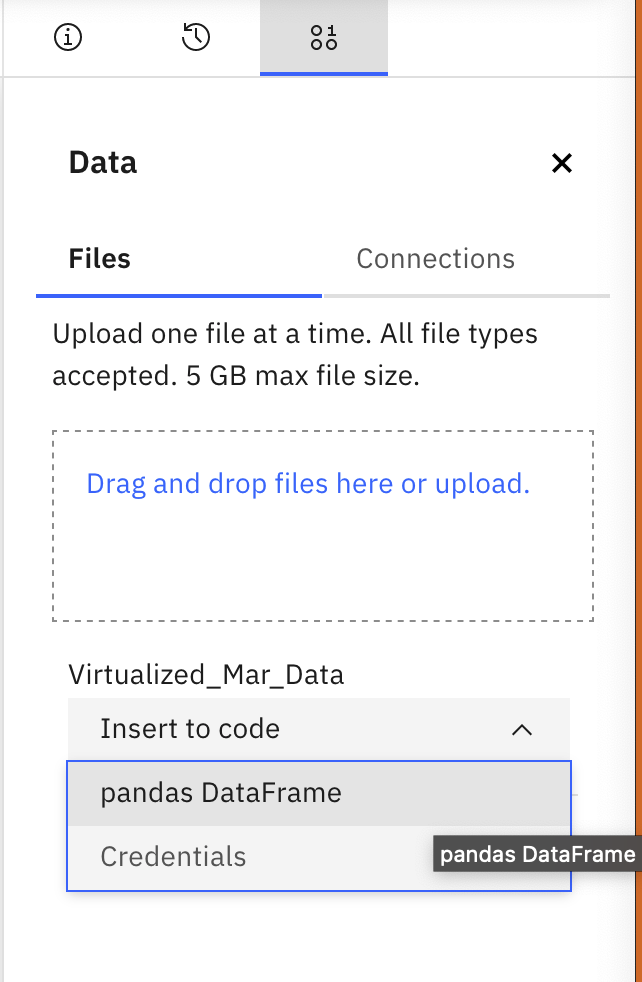

### Below Cell will be generated after clicking on `Pandas DataFrame`

In [ ]:
# @hidden_cell

from project_lib import Project
project = Project.access()

Joined_Data_metadata = project.get_connection(name="Joined_Data")

import os, ibm_db, ibm_db_dbi as dbi, pandas as pd

Joined_Data_dsn = 'DATABASE={};HOSTNAME={};PORT={};PROTOCOL=TCPIP;UID={uid};PWD={pwd}'.format(
    Joined_Data_metadata['database'],
    Joined_Data_metadata['host'],
    Joined_Data_metadata.get('port', 32051),
    uid=Joined_Data_metadata['username'],
    pwd=Joined_Data_metadata['password']
)

Joined_Data_connection = dbi.connect(Joined_Data_dsn)
   
# NOTE:
#  A row limit has been applied to the query to enable sample previewing.
#  Adjust the display message and query as needed by editing the following lines:
from IPython.core.display import display, HTML
#display(HTML("A row limit of 5000 has been applied to the query to enable sample previewing. If the data set is larger, only the first 5000 rows will be loaded."))
query = 'SELECT * FROM "DS-USER1"."FLIGHT_INFO_FULL"'

data_df_1 = pd.read_sql_query(query, con=Joined_Data_connection)
data_df_1.head()

# After use, close the database connection with the following code:
# Joined_Data_connection.close()


### 2. Verify the entire dataset has been pushed to the dataframe

In [ ]:
data_df_1.shape

### 3. Convert the Virtualized data into csv file format in the `data assets`. This updated csv file will be reflected in the `Data assets` tab after executing the step below. 

In [ ]:
# Add your respective <Group Number> while running this cell

project.save_data(file_name = "Airline_Virtualized_Data_Grp_number.csv",data = data_df_1.to_csv(index=False))

# Once the above cell is executed, the csv file will be used in the model development stage.